# Homework #3

## Due Date: Tuesday, December 31, 23:59

### Part 1: Neuronal Spike Train Analysis Using Poisson Processes

   A neuroscientist is studying the firing patterns of a certain type of neuron in the brain. The average firing rate of these neurons is found to be 5 spikes per second. Assuming that the spike train of these neurons can be modeled as a Poisson process:

   a) What is the probability that the neuron fires exactly 10 times in a 2-second interval?

   b) Calculate the probability that the neuron fires at least once within a 0.1-second interval.

   c) What is the expected value of spikes for a 2 second interval?

a) I will solve it using the properties and formula of a Poisson process.
from the question: r = 5 for T = 2, we want to find the prob for n=10
$P(n) = \frac{e^{-rT} \times (rT)^{n}}{n!} \newline$
$P(10) = \frac{e^{-10} \times 10^{10}}{10!} = \frac{e^{-10} \times 100}{3628800} = 1.2511003572113331e-09$

b) In order to get the prob to fire one time in 0.1s Interval I will utilize the same method as above, but because you asked for atleast one time,$\newline$ we have to 1-P(0).$\newline$
$1-P(0) = \frac{e^{-0.5} \times 0.5^{0}}{0!} = \frac{e^{-0.5} \times 0.5}{1} \approx 0.39 $

c) The expected counts of spike in a 2 second inteval is 10, by the definition of Poisson process.

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
print(math.factorial(10))
print((math.exp(-10)*100)/math.factorial(10))
print(1-(math.exp(-0.5)*1))
print(0.5**0)

3628800
1.2511003572113331e-09
0.3934693402873666
1.0


### Part 2: Programming a Poisson Process 

#### Notes:

- For all programming tasks, ensure that your code is well-commented to explain your logic and approach.
- Make sure to handle edge cases, such as negative values of $\lambda$ or $k$, appropriately in your functions.
- In Question 2, if you're unfamiliar with plotting libraries, focus on generating the probabilities and understanding the distribution's shape through the output values before attempting to plot.

#### Question 1: Implementing the Poisson Distribution

**Objective**: Write a program to manually calculate the probability of observing a given number of events $k$ in a fixed interval, given the average rate of occurrences $\lambda$, using the Poisson formula. You are not allowed to use any external libraries that directly compute Poisson probabilities.

**Instructions**:
1. Your program should define a function `poisson_probability(lambda, k)` that takes the average rate $\lambda$ and the desired number of occurrences $k$ as inputs.
2. The function should use the Poisson formula:
   $
   P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
   $
3. Calculate $k!$ (factorial of $k$) using a loop or recursive function.
4. Return the probability of observing exactly $k$ events.
5. Test your function by calculating the probability of observing 3 events for $\lambda = 2.5$.

In [47]:
def factorial(n):
    '''
    A recursive function that computes the factorial of n
    '''
    if n == 0:
        return 1
    return n * factorial(n-1) 
def poisson(lmbda,k):
    '''
    A function to compute the probability of observing exactly k events with a poisson process
    '''
    p = lmbda**k * math.exp(-lmbda)/factorial(k)
    return p

In [9]:
print(poisson(2.5,3))

0.21376301724973645


### Question 2: Drawing a Poisson Distribution

**Objective**: Create a function to simulate and plot the Poisson distribution for a given $\lambda$ over a range of $k$ values (e.g., from 0 to 20). You may use basic plotting libraries (like matplotlib in Python) but should calculate the Poisson probabilities manually using your function from Question 1.

**Instructions**:
1. Define a function `plot_poisson_distribution(lambda, k_range)` where `lambda` is the average rate of events, and `k_range` is the maximum value of $k$ you want to plot.
2. Use your `poisson_probability` function to compute the probabilities for each $k$ from 0 to `k_range`.
3. Store the probabilities in a list or array.
4. Plot $k$ on the x-axis and the corresponding probabilities on the y-axis. Make sure to label your axes appropriately.
5. Test your plotting function with $\lambda = 4$ and `k_range = 15`.

In this function we want to plot the relation ship between the number of events (K) and the probability of observing that number of events (that is giving from the Homogeneous Poisson Process).

In [66]:
def plot_poisson_distribution(lmbda,k_range):
    k_vals = np.arange(k_range+1)
    p = []
    for k in k_vals:
        p.append(poisson(lmbda,k))
    plt.figure(figsize=(10,5))
    plt.plot(k_vals,p)
    
    plt.xlabel("k - number of spikes")
    plt.ylabel("P(k) - probability of observing k spikes")
    plt.title(f"Poisson Distribution for λ = {lmbda}")
    plt.grid()
    
    plt.show()

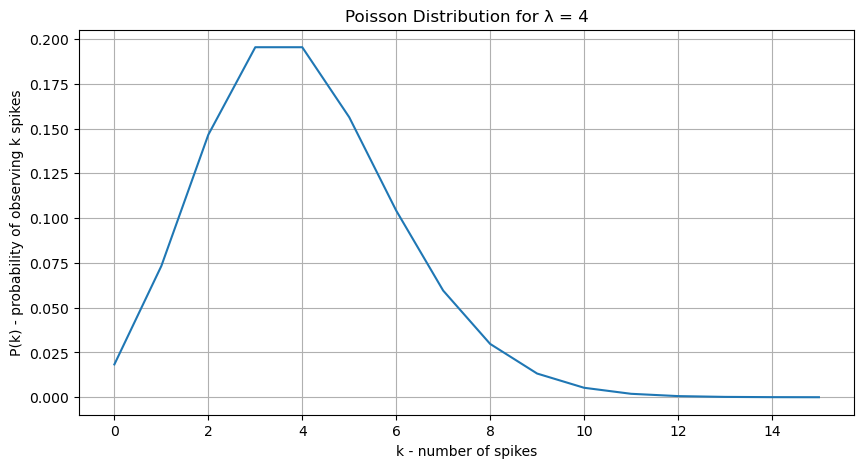

In [67]:
plot_poisson_distribution(4,15)

### Question 3: Calculating the Cumulative Probability

**Objective**: Write a program to calculate the cumulative probability of observing up to $n$ events for a given $\lambda$, without using any external cumulative distribution function.

**Instructions**:
1. Your program should define a function `cumulative_poisson_probability(lambda, n)` that computes the cumulative probability of observing up to $n$ events.
2. The function should sum the probabilities of observing 0 up to $n$ events, using your `poisson_probability` function from Question 1.
3. Return the cumulative probability.
4. Test your function by calculating the cumulative probability of observing up to 5 events for $\lambda = 3$.

In [68]:
def cumulative_poisson_probabillity(lmbda, k):
    p = []
    for k in range(k+1):
        p.append(poisson(lmbda,k))
    return sum(p)

In [69]:
cumulative_poisson_probabillity(3,5)


0.9160820579686966

#### 1.1 
Use the Poisson process generator from last week to create a spike train with $r_0=30$ spikes per second over 60 seconds. Display the result.

#### 1.2

Now add a refractory period parameter to the function, and set it to 1 millisecond. The simulation of
the refractory period should follow these guidelines: After each spike set the
firing rate to 0. Then allow it to recover linearly back to $r_0$ with the recovery rate:

$
r(t) = r_0\frac{t-t_{spike}}{5}
$

where $t_{spike}$ is the time of last spike, and both
$t$ and $t_{spike}$ are timed in milliseconds. Remember that $r(t)$ shouldn't
recover above the initial firing rate $r_0$. Plot the resulting spike train
overlaid with $r(t)$.

#### 1.3
Plot the following quantities for your newly-formed spike train:

##### 1.3.1
Time interval histogram - TIH.

##### 1.3.2
Survivor function.

##### 1.3.3
Hazard function.

#### 3.1
Using the spike generator from the previous part, create a function that can be
used as $r(t)$ of a **bursty** neuron. Create the spike train and plot it.
Don't drop the refractory period part.

#### 3.2
Adapt your homemade convolution function and refactor it into a correlation function. Auto-correlate the spike train with itself using this function.
What does the amplitude of the center peak represent? Normalize the correlation by it.

#### 3.3
Create two oscillating neurons with the same method as the previous question -
first generate two fitting $r(t)$ and then randomize the spike train
accordingly.
Compute the cross-correlation of the neurons using your function. Explain the result - both the time lag ($x$-axis data) of
the peaks and their amplitude ($y$-axis).

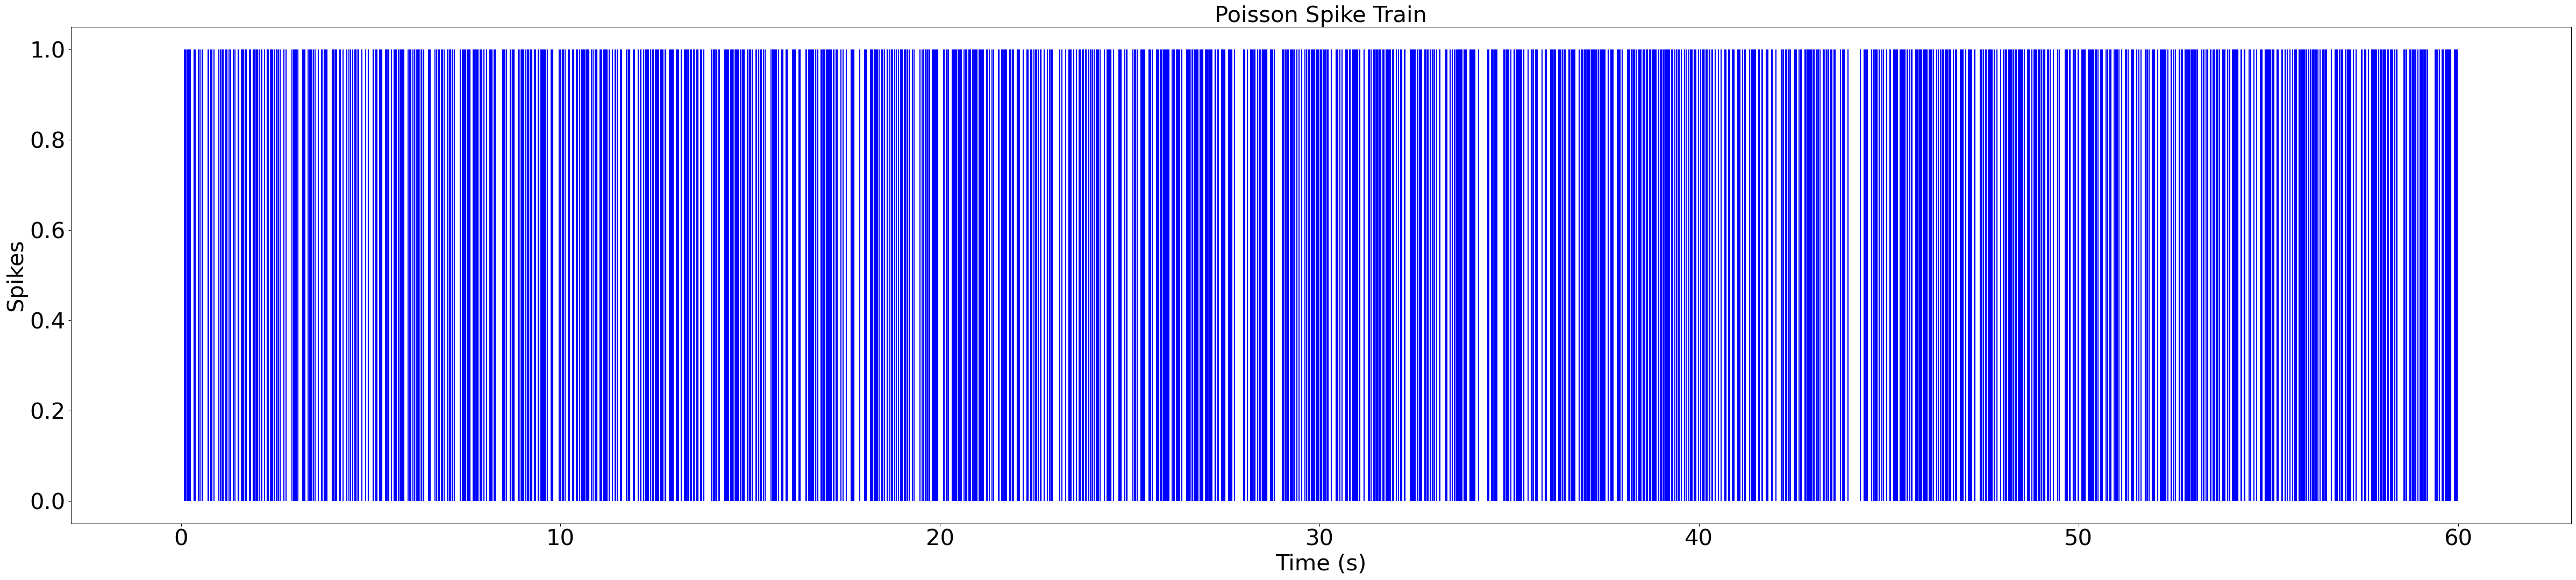

1784


In [359]:
from utils import generatePoiSpikes


r = 30  
dt = 0.001  
T = 60000  

train = generatePoiSpikes(r, dt, T)

plt.figure(figsize=(60,12))
plt.vlines(np.where(train == 1)[0]*dt, 0, 1, color='blue') ## plor spikes in seconds
plt.xlabel("Time (s)", fontsize=30)
plt.ylabel("Spikes", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Poisson Spike Train", fontsize=30)
plt.show()
print(len(np.where(train == 1)[0]))

In [360]:
## adding refractory
def generatePoiSpikes_refractory(r,dt,totalsize):
    '''
    A function to generate a Poisson spike train with refractory period,
    r - firing rate in Hz
    dt - time step in seconds
    totalsize - total number of time steps (ms)
    '''
    spiketrain = np.zeros(totalsize)
    
    rates = np.ones(totalsize)*r
    lastspike = None
    for i in range(totalsize):
        if lastspike != None:
            time = (i-lastspike)
            rates[i] = min(r,(r*time)/(5))
        ##generate spikes
        if np.random.rand() < rates[i]*dt:
            spiketrain[i] = 1
            rates[i] = 0
            lastspike = i
    return spiketrain, rates
        
    

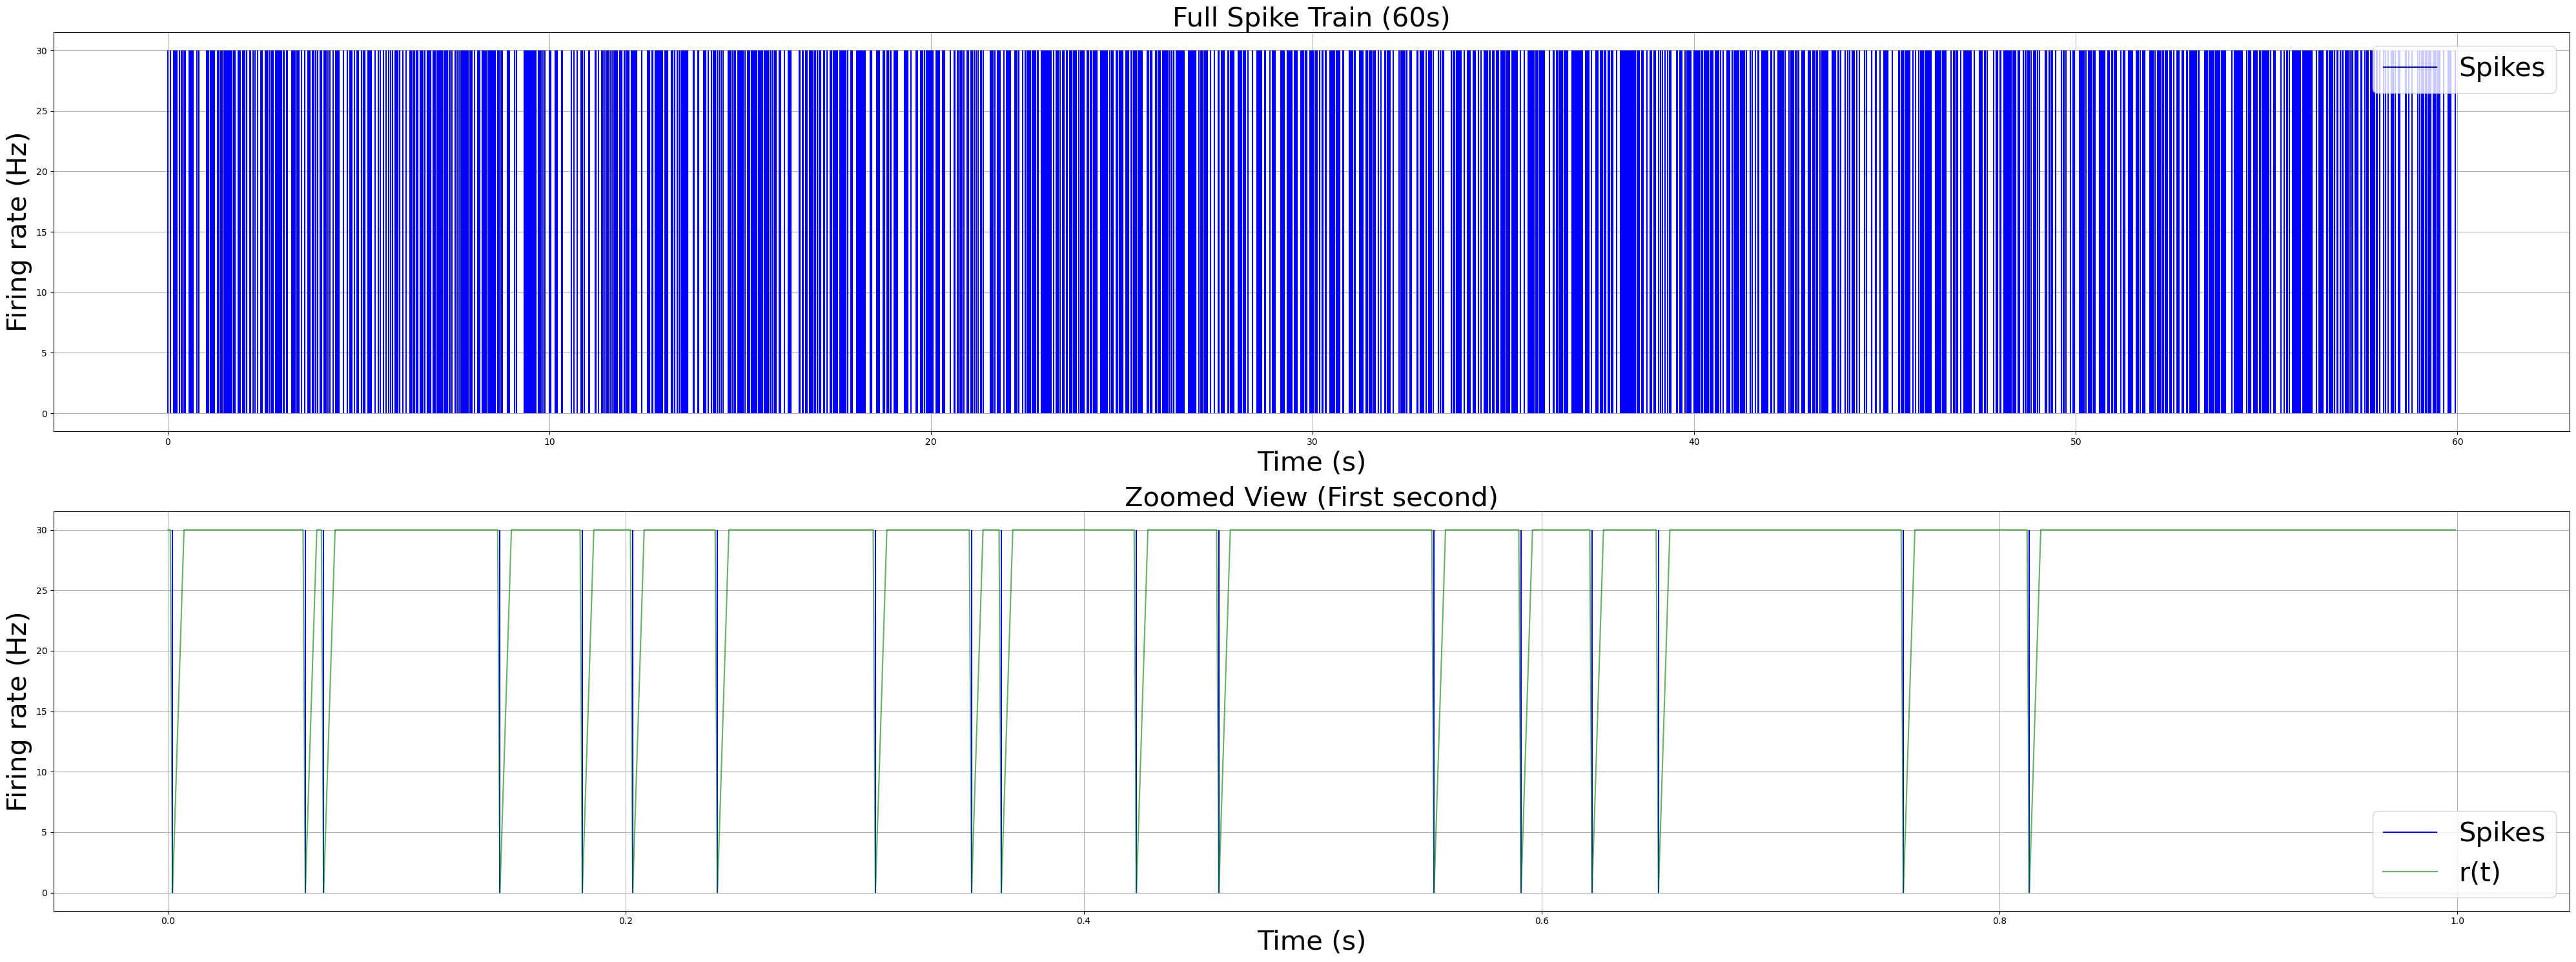

In [361]:
# Generate full spike train
spiketrain, rates = generatePoiSpikes_refractory(30, 0.001, 60000)

plt.figure(figsize=(40,15))

plt.subplot(2,1,1)
plt.vlines(np.where(spiketrain == 1)[0]*0.001, 0, 30, color='blue', label='Spikes')
plt.xlabel("Time (s)",fontsize=30)
plt.ylabel("Firing rate (Hz)",fontsize=30)
plt.title("Full Spike Train (60s)",fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)

# Bottom subplot: Zoomed in to 1s
plt.subplot(2,1,2)
window = 1000  
plt.vlines(np.where(spiketrain[:window] == 1)[0]*0.001, 0, 30, color='blue', label='Spikes')
plt.plot(np.arange(window)*0.001, rates[:window], 'g-', label='r(t)', alpha=0.6)
plt.xlabel("Time (s)",fontsize=30)
plt.ylabel("Firing rate (Hz)",fontsize=30)
plt.title("Zoomed View (First second)",fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()


In [362]:
## Check my rates accumulation
print(np.unique(rates))
print(len(np.where(spiketrain == 1)[0])) ## want to see reduce in the spikes

[ 0.  6. 12. 18. 24. 30.]
1647


### 1.3 TIH
Time interval histogram (TIH) is useful metric for spike trains, computing it allows us to visualize the distribution of inter-spike intervals (ISIs) in the spike train.

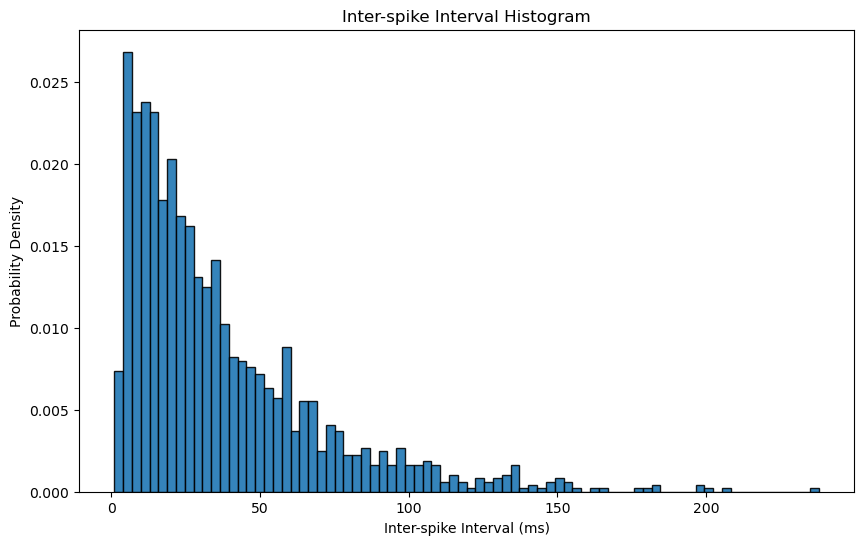

In [363]:
def isi_calc(spiketrain):
    '''
    A function to compute the interspike intervals,
    It expects a spiketrain in ms 
    '''
    spikes = np.where(spiketrain == 1)[0]
    intervals = np.diff(spikes)
    return intervals

intervals = isi_calc(spiketrain)
plt.figure(figsize=(10,6))
plt.hist(intervals, bins=80,alpha=0.9, edgecolor='black',density=True)

plt.xlabel('Inter-spike Interval (ms)')
plt.ylabel('Probability Density')
plt.title('Inter-spike Interval Histogram')
plt.show()

### We can see the refractory period from the near 0ms in the histogram.
### Hazard and Survival function:
The Hazard and survival function are linked, the Survival function shows us the probability of not having a spike at a given time, while the Hazard function shows us the probability of having a spike at a given time. $\newline$
Mathematically, the Survival function is defined as:
$S(t|t_0) = 1 - P(\text{spike until t}) $ $\newline$
Because the Hazrd function is the probability of having a spike at a given time given a spike at t0, it's also the rate in which the survival function is decreasing!
$\newline$
$p(t|t_0) =- \frac{d(S(t|t_0))}{dt}\cdot \frac{1}{S(t|t_0)} = - \frac{P(\text{spike until t)}}{S(t|t_0)}$

In [374]:
## Let's start to compute the survival function

def survival(spiketrain):
    '''
    A function to compute the survival function
    It expects a spiketrain in ms 
    '''
    isi = isi_calc(spiketrain)
    hist,edges = np.histogram(isi, bins=80, density=True)
    bin_w = edges[1] - edges[0] ## un normalize the histogram
    return 1- np.cumsum(hist)*bin_w

def hazard(spiketrain):
    '''
    A function to compute the hazard function
    It expects a spiketrain in ms 
    '''
    surv = survival(spiketrain)
    hazard = -np.gradient(surv)/(surv+1e-9) ##adding a small value to avoid division by zero, gradient using np.gradient
    return hazard

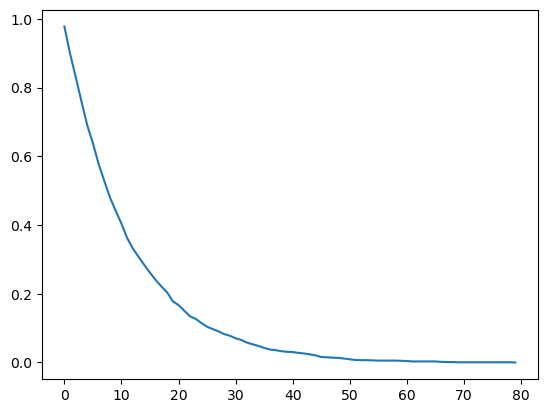

In [365]:
plt.plot(survival(spiketrain)) 


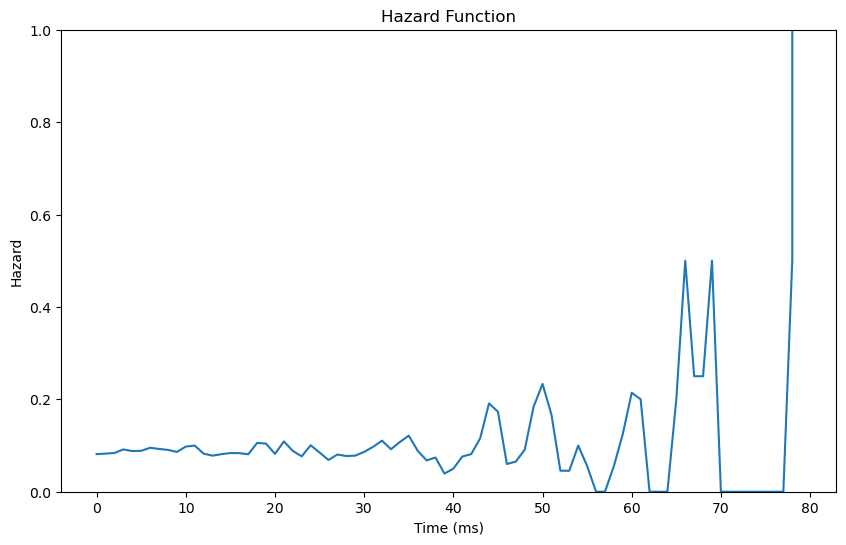

In [375]:
plt.figure(figsize=(10,6))
plt.plot(hazard(spiketrain))
plt.xlabel('Time (ms)')
plt.ylabel('Hazard')
plt.ylim(0,1)
plt.title('Hazard Function')
plt.show()

### 3.1 Now we want to add burstiness to our generator

In [16]:
## adding refractory
def generatePoiSpikes_refractory_burst(r,dt,totalsize):
    '''
    A function to generate a Poisson spike train with refractory period,
    r - firing rate in Hz
    dt - time step in seconds
    totalsize - total number of time steps (ms)
    '''
    spiketrain = np.zeros(totalsize)
    rates = np.ones(totalsize) * r
    
    last_spike_time = None
    in_burst = False
    burst_start_time = None

    for i in range(totalsize):
        # Handle refractory period
        if spiketrain[i-1] == 1:
            # Start a new burst
            in_burst = True
            burst_start_time = i-1
            rates[i] *= 5
        if in_burst and  (i - burst_start_time) >= (3): ##Need to think about a smarter way to end the burst
            # End the burst
            in_burst = False
        if last_spike_time is not None and not in_burst:
            time_since_last_spike = i - last_spike_time
            if r>(r * time_since_last_spike) / 5:
                rates[i] =  (r * time_since_last_spike) / 5  
            else:
                rates[i]=r

        if np.random.rand() < rates[i] * dt:
            spiketrain[i] = 1
            rates[i] = 0
            last_spike_time = i

    return spiketrain, rates
        
    

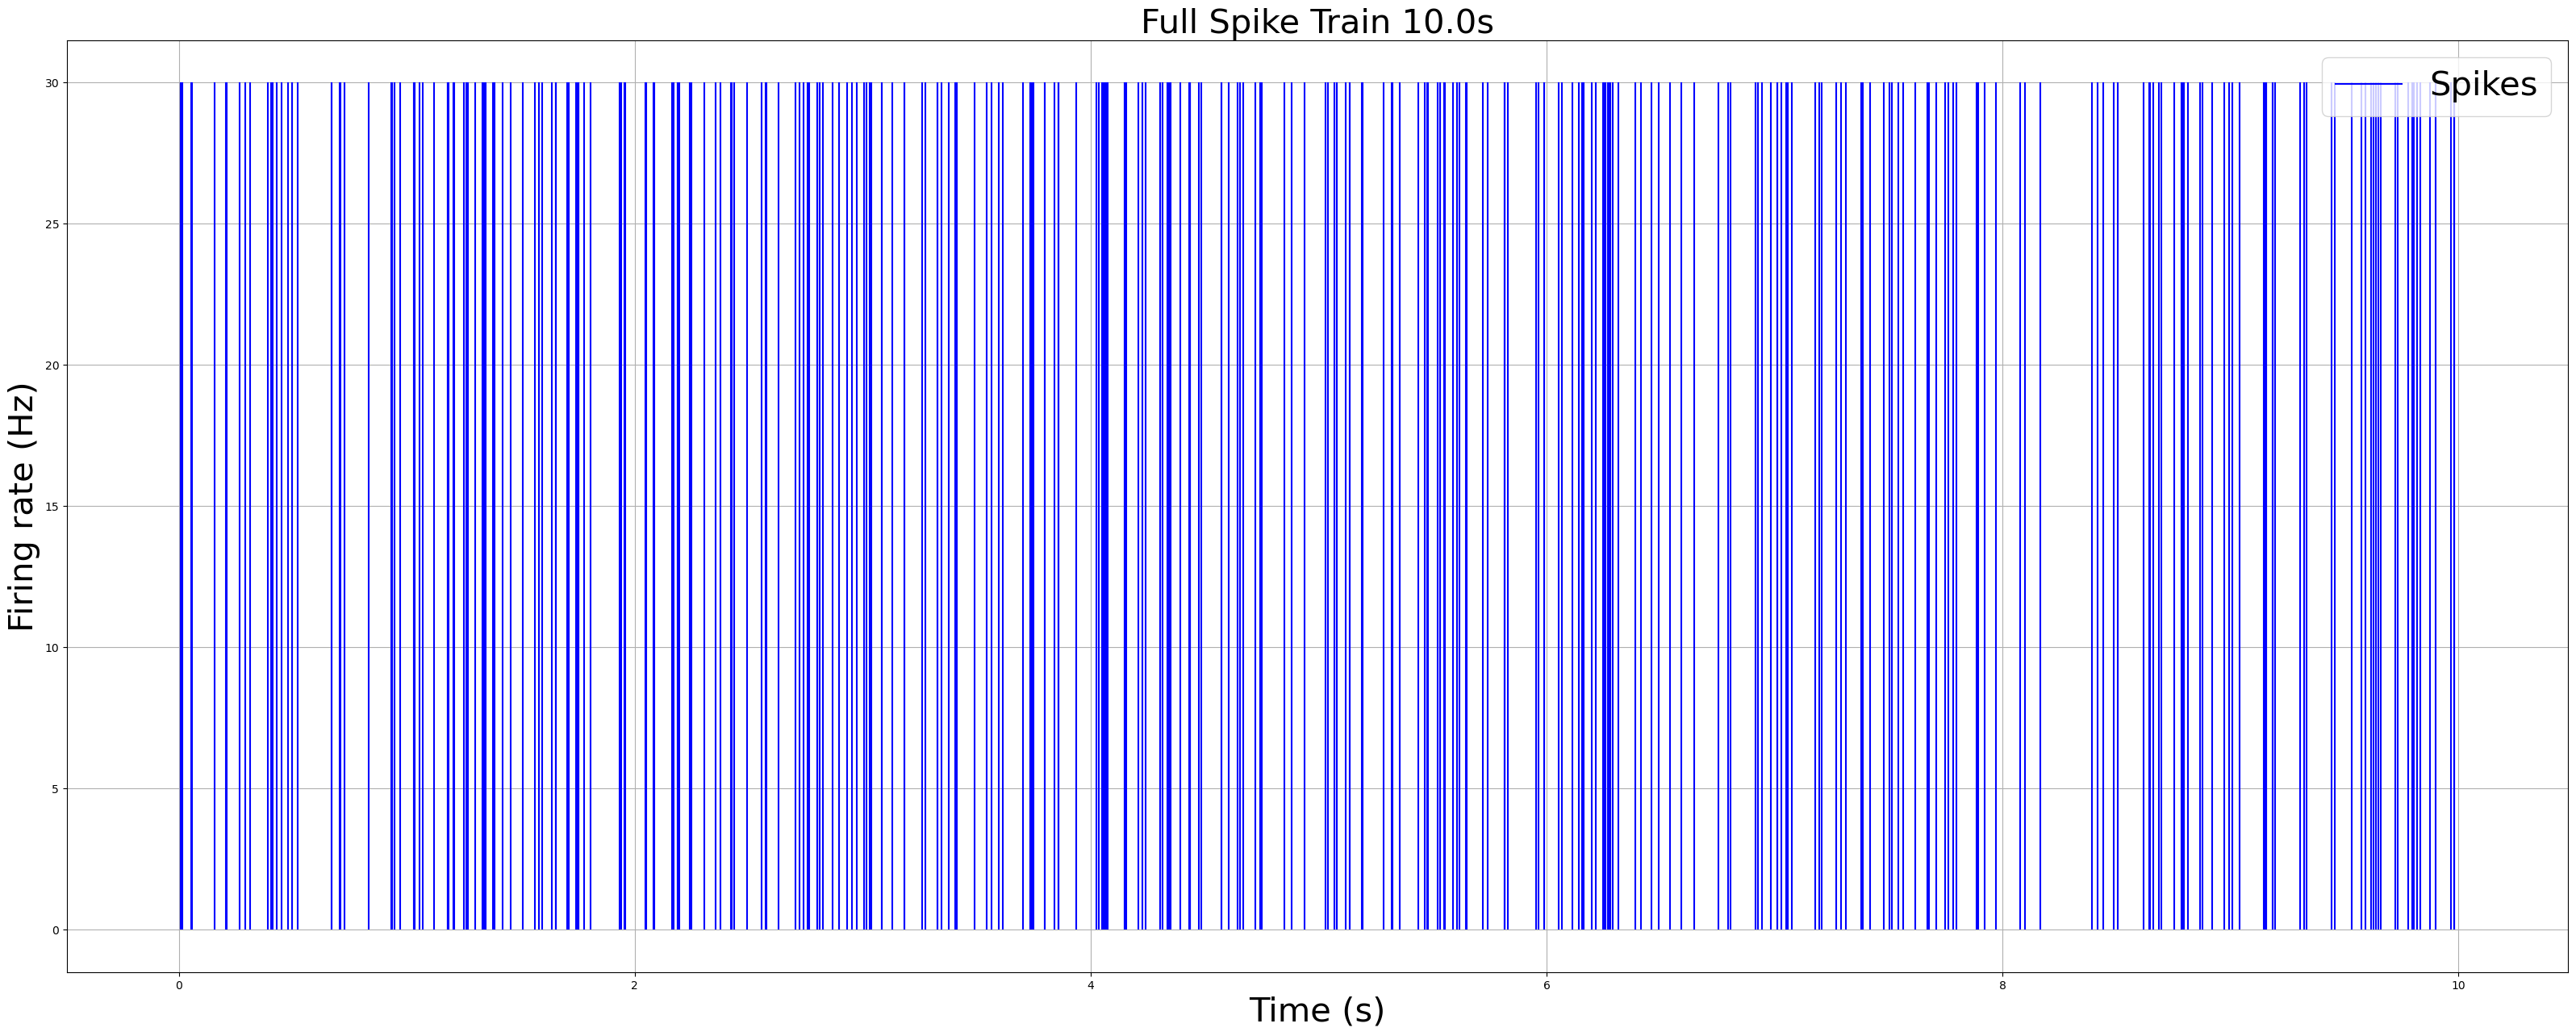

In [61]:
spiketrain, rates = generatePoiSpikes_refractory_burst(30, 0.001, 10000)

plt.figure(figsize=(40,15))

plt.vlines(np.where(spiketrain == 1)[0]*0.001, 0, 30, color='blue', label='Spikes')
plt.xlabel("Time (s)",fontsize=30)
plt.ylabel("Firing rate (Hz)",fontsize=30)
plt.title(f"Full Spike Train {len(spiketrain)/1000}s",fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)

In [62]:
## Check my rates accumulation
print(np.unique(rates))
print(len(np.where(spiketrain == 1)[0])) ## want to see reduce in the spikes

[  0.  18.  24.  30. 150.]
360


### 3.2 Auto-correlation

In [94]:
##Adjusting my _conv to do auto correlation

def autocorrelation(spiketrain):

    n = len(spiketrain)
    output = np.zeros(2*n-1)

    for i in range(n):
            for j in range(n):
                output[(i-j)+(n-1)] += spiketrain[i]*spiketrain[j] 
                
    #center= output[n-1]
    #output = output/center
    return output

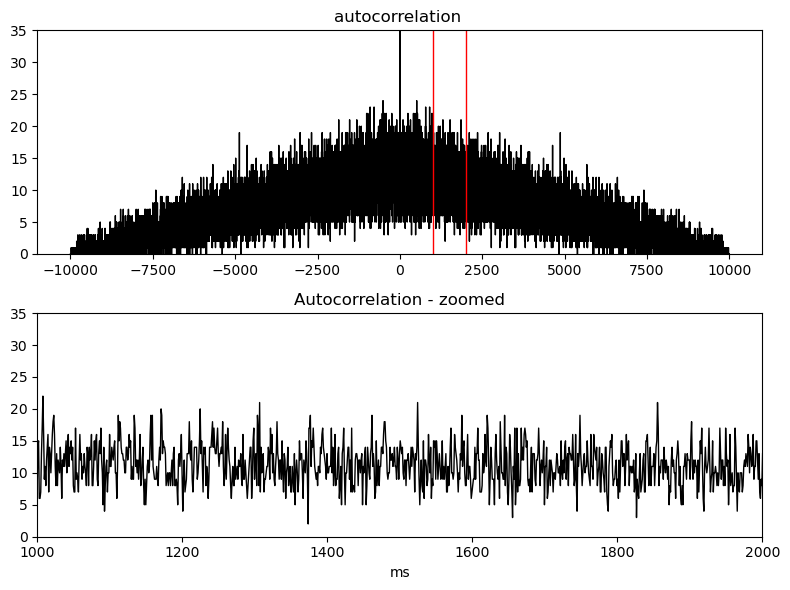

In [97]:
#autocorrelation = autocorrelation(spiketrain)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(autocorrelation))-len(autocorrelation)/2, autocorrelation, 'k-', linewidth=1)  
plt.title("autocorrelation ")
plt.axvline(1000, color='r', linewidth=1)
plt.axvline(2000, color='r', linewidth=1)
plt.ylim(0,35)
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(autocorrelation))-len(autocorrelation)/2, autocorrelation, 'k-', linewidth=1)  
plt.xlim(1000, 2000)
plt.ylim(0,35)
plt.title('Autocorrelation - zoomed')
plt.xlabel('ms')

plt.tight_layout()
plt.show()

### 3.3 Cross corellation

In [105]:
spiketrain1, rates1 = generatePoiSpikes_refractory_burst(25, 0.001, 10000)
spiketrain2, rates2 = generatePoiSpikes_refractory_burst(10, 0.001, 10000)

In [102]:
def crosscorrelation(train1, train2):
    n1 = len(train1)  
    n2 = len(train2)
    
    output = np.zeros(n1+n2-1)
    
    # Compute cross-correlation
    for i in range(n1):
        for j in range(n2):
            output[(i-j)+(n2-1)] += train1[i]*train2[j]
            
    return output

In [106]:
cross = crosscorrelation(spiketrain1, spiketrain2)

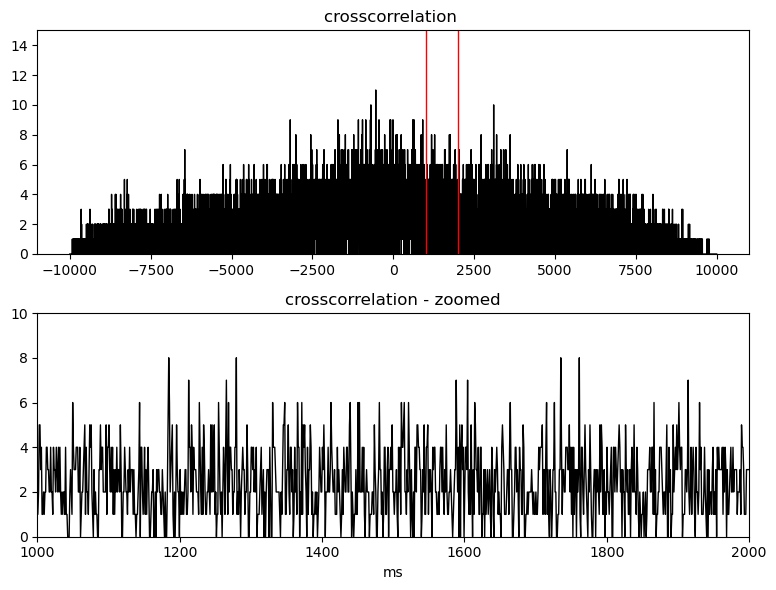

In [112]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(cross))-len(cross)/2, cross, 'k-', linewidth=1)  
plt.title("crosscorrelation ")
plt.axvline(1000, color='r', linewidth=1)
plt.axvline(2000, color='r', linewidth=1)
plt.ylim(0,15)
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(cross))-len(cross)/2, cross, 'k-', linewidth=1)  
plt.xlim(1000, 2000)
plt.ylim(0,10)
plt.title('crosscorrelation - zoomed')
plt.xlabel('ms')

plt.tight_layout()
plt.show()

I used two different r(t) to show the cross-correlation. 
We can see that the pick around 0 is not as it was the case in the autocorrelation.
We do see some correlation though.
